# Proyecto final ML - EDA

Github:


## Métodologia

1.	Carga y limpieza de datos. (Se encuentra dentro de el documento py funciones)

2.	EDA para entender los datos desde una perspectiva en conjunto e individual.

3.	Probar distintos modelos:

* Regresiones lineales para predecir la valoración
* Redes neuronales para predecir la valoración
* Kprototypes, permite usar variables categóricas para formar clusters y así encontrar grupos de las startups. Adicional, gracias a la experiencia de negocio, se puede identificar cuáles son más propensos al éxito y así evaluar una nueva Startup dependiendo el grupo asignado por el algoritmo.

4.	Producción: Diseñar un mecanismo para que se pueda evaluar una nueva startup en producción y mejorar las oportunidades de éxito para el fondo que requiera este modelo.

5. Resultados y conclusiones

## Descripción de los datos

* startup:                           Nombre de la Startup
* most_recent_raised_to_date:        Último dato disponible sobre el monto levantado en la última ronda
* primary_industry_code:             Industria a la que pertenece la startup
* most_recent_deal_type_2:           Tipo de transacción del último levantamiento de capital
* brief_description:                 Descripción del modelo de negocio de la startup
* year_founded:                      Año de fundación
* hq_country:                        Pais donde se fundo la Startup
* biography:                         Biografia del fundador
* active_investors_names:            Inversionistas 
* most_recent_post_valuation:        Ultima valoración de la compañia post money
* employees:                         Numero de empleados
* lead_partners_on_deals_count:      Nombre de los inversionistas lideres
* professionals_count:               Numero de especialistas dentro de la compañia
* deals_count:                       Numero de rondas levantadas por la compañia
* business_status:                   Etapa de negocio en la que se encuentra la compañia
* most_recent_pr_acquired:           Porcentaje adquirido por los inversionistas en la ultima ronda
* most_recent_deal_size:             Tamaño de la ultima transacción de la compañia
* last_known_valuation:              Ultima valoración de la compañia pre money
* subsidiary_companies_count:        Numero de subsidiarias de la compañia
* country:                           País normalizado

## Requerimientos, carga de datos y limpieza

In [1]:
# Manejo de datos
import pandas as pd 
import datetime as dt 
import numpy as np 

# Graficas
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos
from sklearn.linear_model import LinearRegression
from kmodes.kprototypes import KPrototypes

# funcion de limpieza de datos
from funciones import limpiar_datos_venture 


## 2. EDA

### Analísis de datos Univariados

In [2]:
# Cargamos los datos
df_raw  =  pd.read_csv('startups_data.csv')

# Esta funcion nos trae una base limpia de los datos y otra que esta normalizada
df, df_norm = limpiar_datos_venture(df_raw)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

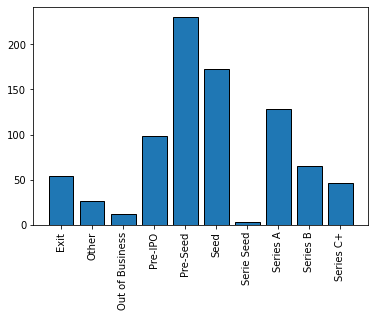

In [3]:
# Grafica de barra de etapas de las startups
deal_type_graph  =  df.groupby('most_recent_deal_type_2')['startup'].count()

plt.bar(deal_type_graph.index, deal_type_graph.values, edgecolor = 'black') 
plt.xticks(rotation = 90)

(array([2008., 2010., 2012., 2014., 2016., 2018., 2020., 2022., 2024.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

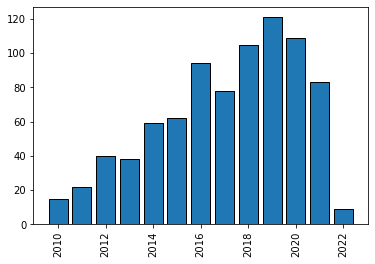

In [4]:
# Grafica de barra de etapas de las startups
year_founded_graph  =  df.groupby('year_founded')['startup'].count()

plt.bar(year_founded_graph.index, year_founded_graph.values, edgecolor = 'black') 
plt.xticks(rotation = 90)

### Analísis de datos multivariados

<Figure size 720x720 with 0 Axes>

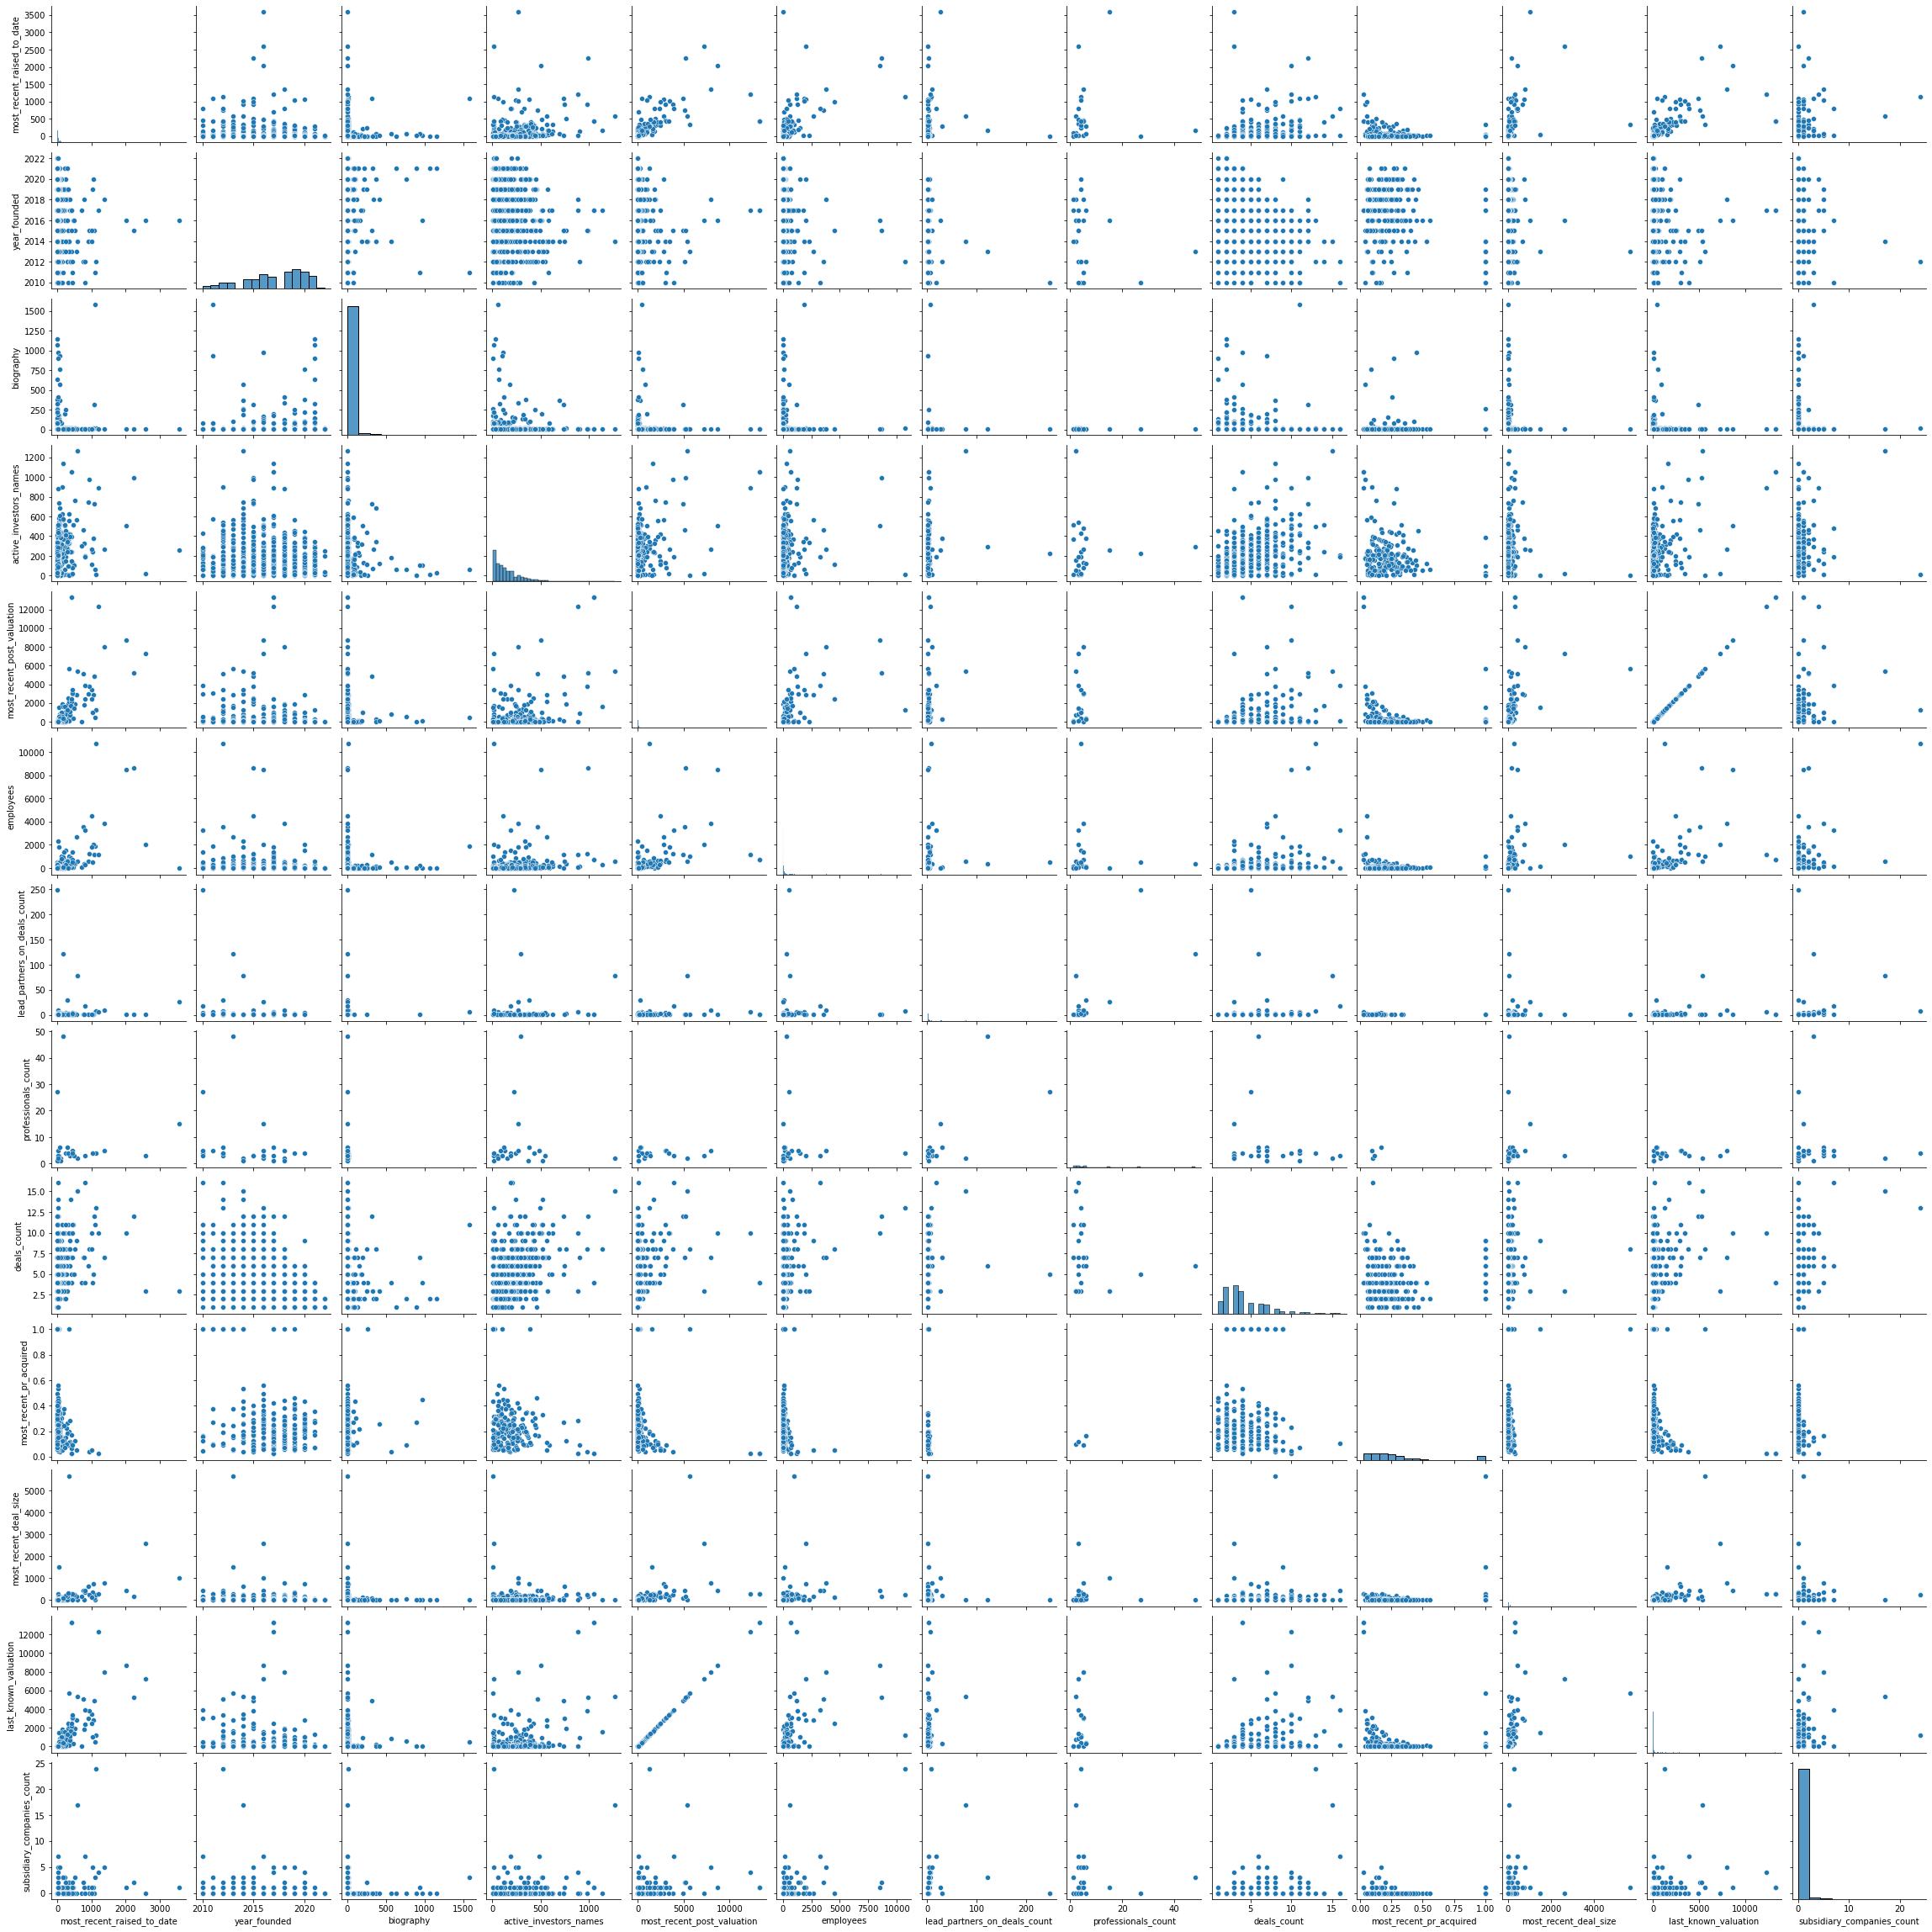

In [5]:
# Analisis bivariado
plt.figure(figsize = (10,10))
sns.pairplot(data = df)
plt.show()

C:\Users\emili\AppData\Local\Temp\ipykernel_16012\429112152.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_correlations,dtype=np.bool)


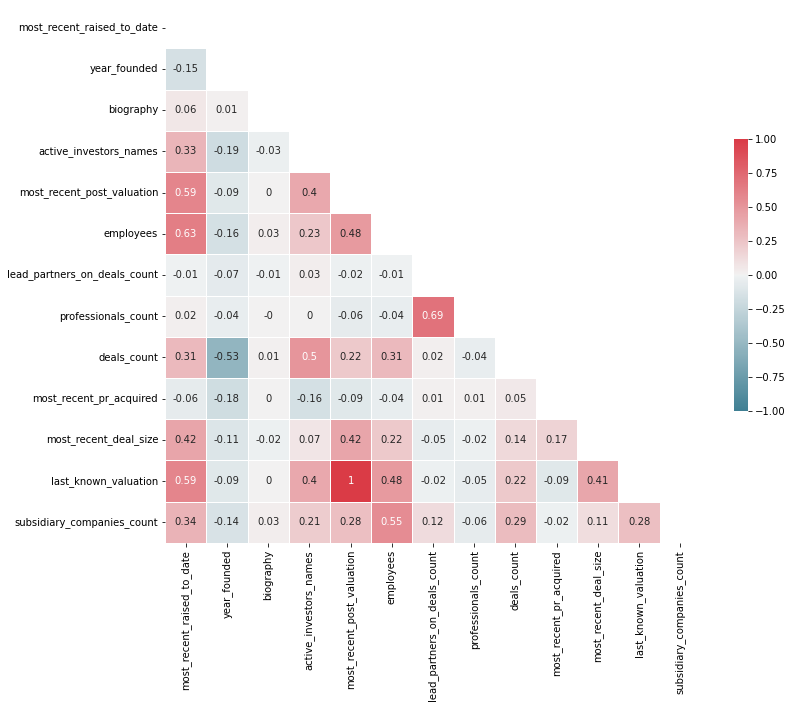

In [9]:
#Compute correlation matrix
df_correlations = df_norm.corr().round(2)

#mask the uper half for visualization purposes
mask = np.zeros_like(df_correlations,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize = (12,10))

cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(df_correlations,mask=mask, vmax=1, vmin=-1, cmap=cmap,
           center=0,
           annot = True,
           square=True, linewidths=.5, cbar_kws={"shrink": .5});


In [10]:
target_features = {'most_recent_raised_to_date'}

num_features = {'year_founded',
                'biography',
                'active_investors_names',
                'employees',
                'lead_partners_on_deals_count',
                'professionals_count',
                'deals_count',
                'most_recent_pr_acquired',
                'most_recent_deal_size',
                'last_known_valuation',
                'subsidiary_companies_count'
                }

cat_features = {'primary_industry_code',
                'most_recent_deal_type_2',
                'country',
                'business_status',
                }

In [11]:
df_norm['last_known_valuation'] = np.log(df['last_known_valuation'])

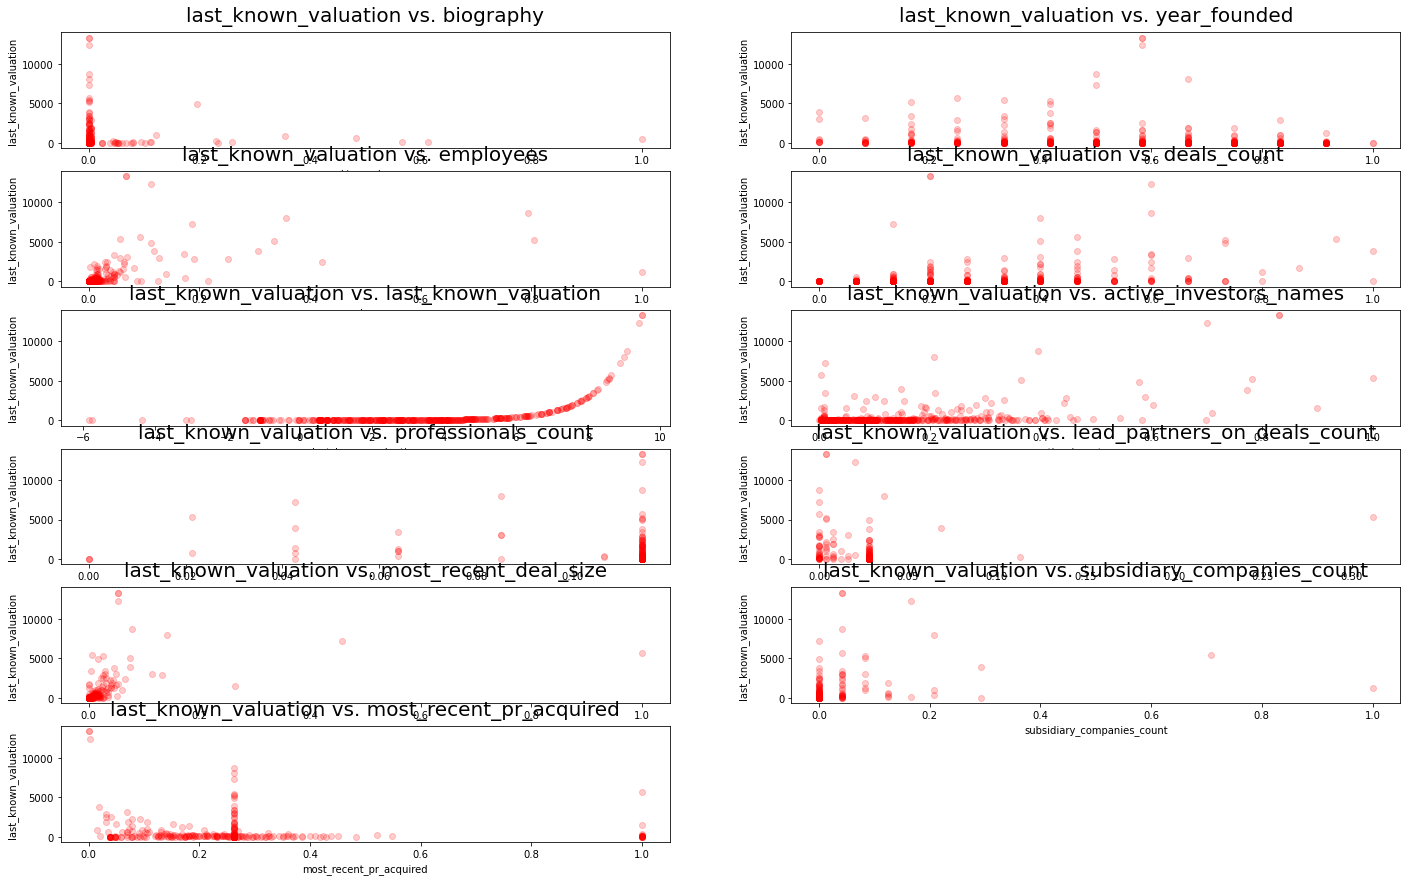

In [12]:
# Bivariados contra ultimo valor levantado en una ronda
plt.figure(figsize=(24,20))
varstolook = num_features
for i,feature in enumerate(varstolook):
    plt.subplot(8,2,i+1)
    colvalues = df_norm[feature]
    plt.scatter(colvalues.values, df.last_known_valuation.values, alpha=0.20, edgecolor=None, color='red')
    plt.xlabel(feature)
    plt.ylabel('last_known_valuation')
    plt.title("last_known_valuation vs. " + feature, fontsize=20, verticalalignment='bottom');

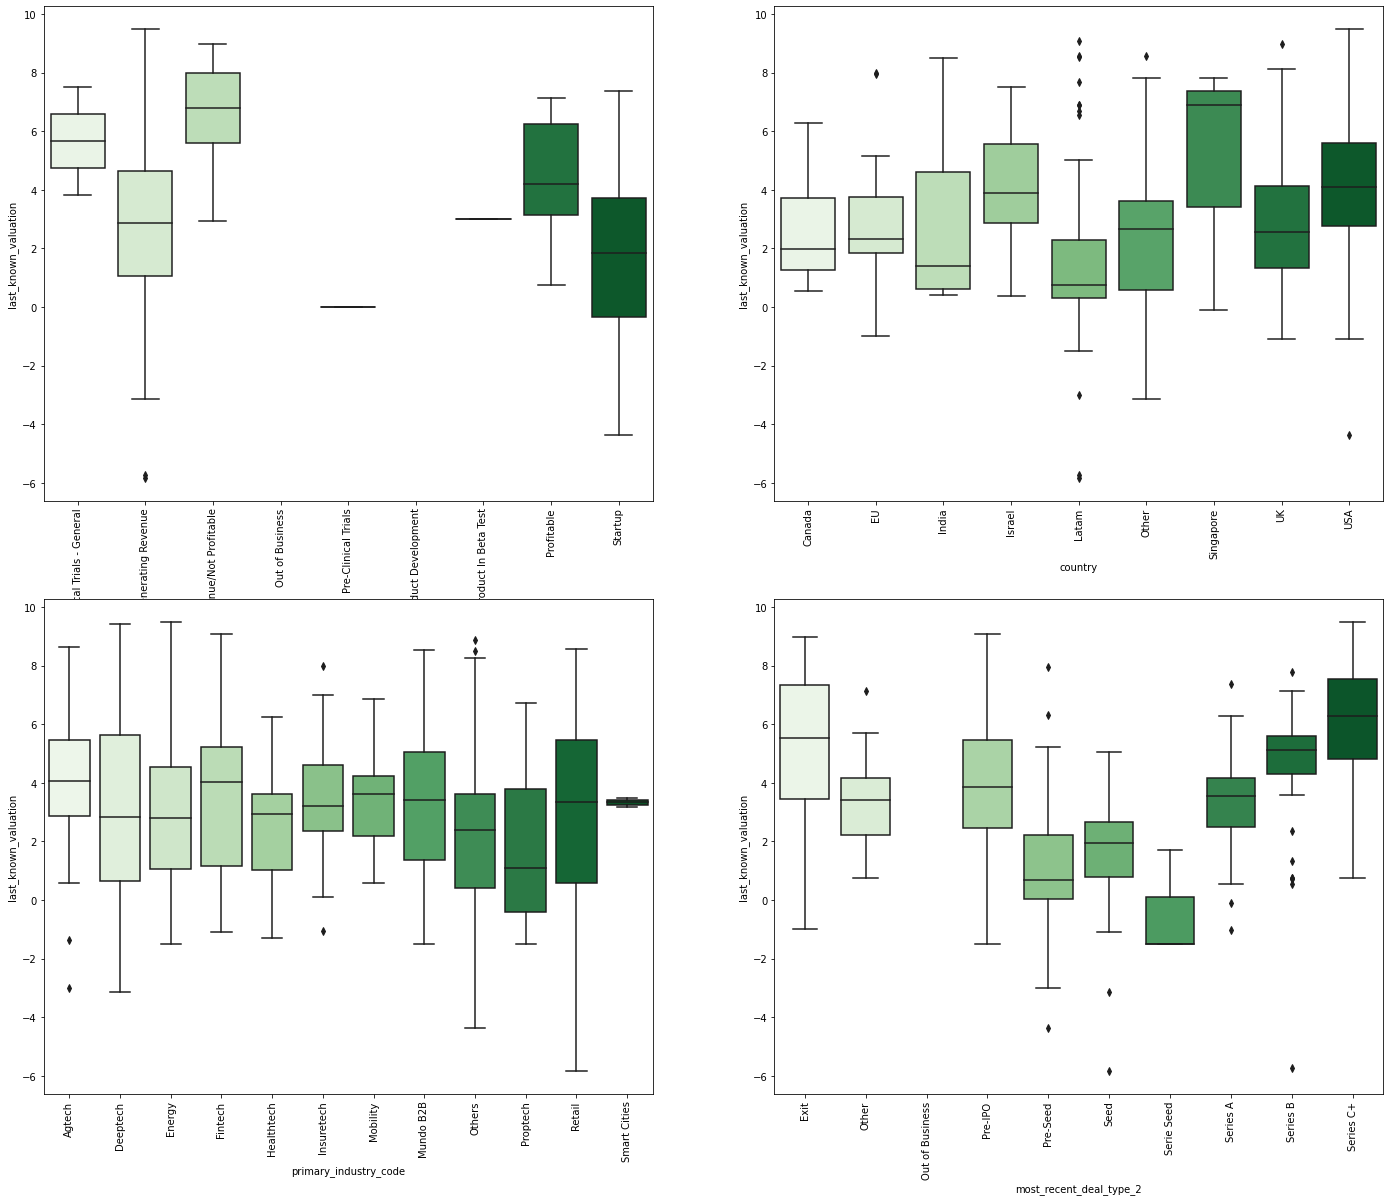

In [13]:
# Second we will analize the relation between non-numeric categorical features and the most_recent_valuations
plt.figure(figsize=(24,20))
varstolook = cat_features
for i,feature in enumerate(varstolook):
    plt.subplot(2,2,i+1)
    pl2 = sns.boxplot(x=feature, y="last_known_valuation", data = df_norm, palette="Greens")
    pl2.set_xticklabels(pl2.get_xticklabels(), rotation=90, ha="center");

## 3. Modelos

In [14]:
# Paquetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Librerias que optimizan basandose en optimización numerica
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict

import statsmodels.api as sm # modelo estadistico
import statsmodels.formula.api as smf # modelo estadistico

# librerias de claisificación
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Configurations
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format',  '{:,.2f}'.format)
# pd.reset_option('display.precision')

In [15]:
# Crear la y a predecir, esta seria la ultima valoración de la empresa
drop_cols = list(df_norm.columns.difference(num_features))
drop_cols.append('last_known_valuation')


X = df_norm.drop(drop_cols, axis = 1).interpolate()
y = df_norm['last_known_valuation'].to_frame().interpolate()

X.rename(columns = {'most_recent_%_acquired':'most_recent_acquired'}, inplace = True)

### MCO Ridge & Lasso

In [16]:
# Modelo ridge

n_alfas = 1000 # Numero de alfas

# Modelo Ridge, asumimos con funcion de perdida la MSE (Mean Squared Error)
modelo_ridge = RidgeCV(
            alphas          = np.logspace(10, -2, n_alfas), # factor de castigo
            fit_intercept   = True, # que tenga intercpeto (Podria no tener intercepto)
            normalize       = False, # que me normalice los datos
            store_cv_values = True) # deseamos que el modelo quede con los estimadores de la Validación Cruzada

_ = modelo_ridge.fit(X = X, y = y) # La raya al piso es como correrlo sin el =

'''Preguntar porque la variable _'''

# Evolución de los coeficientes en función de alpha

# ==============================================================================
alphas = modelo_ridge.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=True, normalize=False)
    modelo_temp.fit(X, y)
    coefs.append(modelo_temp.coef_.flatten())

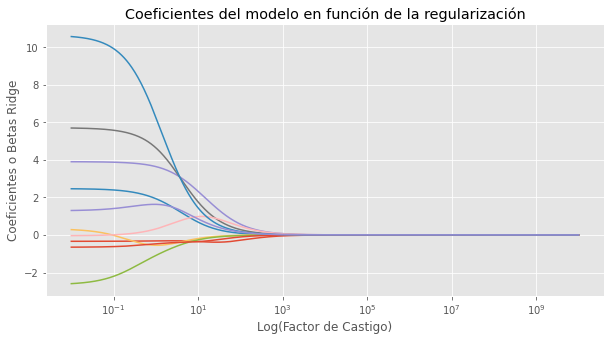

In [17]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('Log(Factor de Castigo)')
ax.set_ylabel('Coeficientes o Betas Ridge')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show() 

Text(0.5, 1.0, 'Coeficientes del modelo')

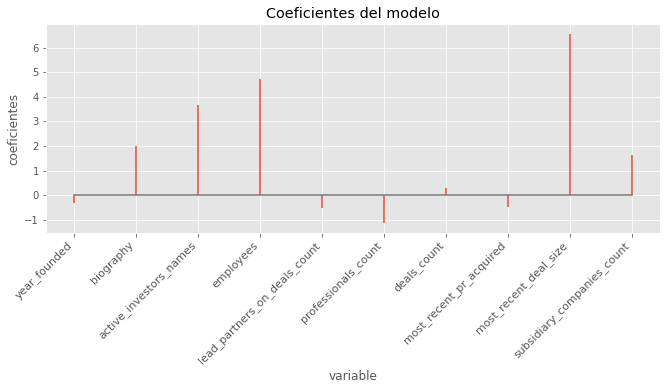

In [18]:
df_coeficientes_ridge = pd.DataFrame(
                        {'predictor': X.columns,
                         'coef': modelo_ridge.coef_.flatten()}
                  )

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes_ridge.predictor, df_coeficientes_ridge.coef, markerfmt=' ')
plt.xticks(rotation=45, ha='right', size=11)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo')

# Pregunta: Nuevamente como hacemos para evaluar la variable de region que no se encuentra. 

In [19]:
df_coeficientes_ridge # Modelo estimado con la Validación Cruzada

,predictor,coef
0,year_founded,-0.32
1,biography,1.98
2,active_investors_names,3.67
3,employees,4.74
4,lead_partners_on_deals_count,-0.55
5,professionals_count,-1.15
6,deals_count,0.29
7,most_recent_pr_acquired,-0.49
8,most_recent_deal_size,6.57
9,subsidiary_companies_count,1.63


In [20]:
# Modelo Lasso, asumimos con funcion de perdida la MSE (Mean Squared Error)

modelo_lasso = LassoCV(alphas = np.logspace(10, -2, n_alfas), normalize= False, fit_intercept = True, cv = 10)
_ = modelo_lasso.fit(X = X, y = y)

# Evolución de los coeficientes en función de alpha

# ==============================================================================
alphas = modelo_lasso.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=True, normalize=False)
    modelo_temp.fit(X, y)
    coefs.append(modelo_temp.coef_.flatten())

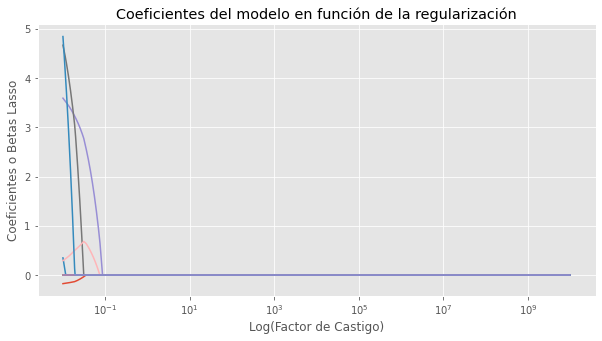

In [21]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('Log(Factor de Castigo)')
ax.set_ylabel('Coeficientes o Betas Lasso')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show() 

# Pregunta: Como le podriamos meter el nombre de las variables

Text(0.5, 1.0, 'Coeficientes del modelo')

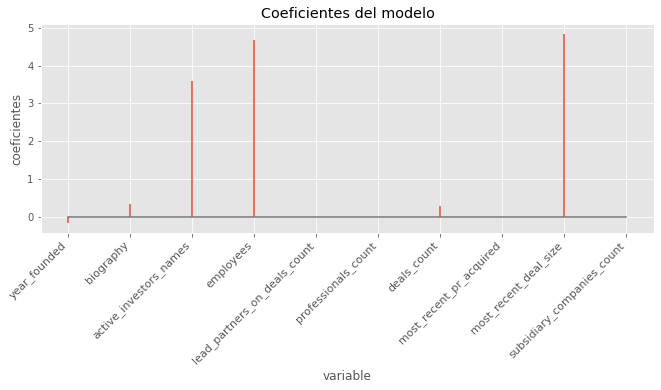

In [22]:
df_coeficientes_lasso = pd.DataFrame(
                        {'predictor': X.columns,
                         'coef': modelo_lasso.coef_.flatten()}
                  )

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes_lasso.predictor, df_coeficientes_lasso.coef, markerfmt=' ')
plt.xticks(rotation=45, ha='right', size=11)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo')

# Pregunta: Nuevamente como hacemos para evaluar la variable de region que no se encuentra.

In [23]:
df_coeficientes_lasso # Modelo estimado con la Validación Cruzada

,predictor,coef
0,year_founded,-0.17
1,biography,0.35
2,active_investors_names,3.59
3,employees,4.67
4,lead_partners_on_deals_count,-0.00
5,professionals_count,-0.00
6,deals_count,0.29
7,most_recent_pr_acquired,-0.00
8,most_recent_deal_size,4.84
9,subsidiary_companies_count,0.00


### MCO Linear regresion no regularizada

In [24]:
lin_reg = LinearRegression().fit(X, y)

In [25]:
Estimadores = df_coeficientes_ridge.set_index("predictor")
Estimadores.columns = ["Ridge"]
Estimadores = pd.concat([Estimadores,df_coeficientes_lasso[["coef","predictor"]].set_index("predictor").rename(columns = {"coef":"Lasso"})], axis= 1)
Estimadores = pd.concat([Estimadores,pd.DataFrame(lin_reg.coef_.flatten(), index = X.columns.tolist(), columns = ["MCO"])], axis= 1)

Estimadores

,Ridge,Lasso,MCO
year_founded,-0.32,-0.17,-0.34
biography,1.98,0.35,2.47
active_investors_names,3.67,3.59,3.90
employees,4.74,4.67,5.70
lead_partners_on_deals_count,-0.55,-0.00,0.33
professionals_count,-1.15,-0.00,-2.65
deals_count,0.29,0.29,-0.04
most_recent_pr_acquired,-0.49,-0.00,-0.65
most_recent_deal_size,6.57,4.84,10.64
subsidiary_companies_count,1.63,0.00,1.29


In [26]:
y_mco_hat = lin_reg.predict(X)
y_ridge_hat = modelo_ridge.predict(X)
y_lasso_hat = modelo_lasso.predict(X)

res_modelos = pd.concat([pd.DataFrame(y_mco_hat).rename(columns = {0:"MCO"}),pd.DataFrame(y_ridge_hat).rename(columns = {0:"RIDGE"})], axis = 1)
res_modelos = pd.concat([res_modelos,pd.DataFrame(y_lasso_hat).rename(columns = {0:"LASSO"})], axis = 1)
res_modelos = pd.concat([res_modelos,y.reset_index().drop("index", axis =1)], axis = 1)
res_modelos

,MCO,RIDGE,LASSO,last_known_valuation
0,4.11,4.09,4.03,0.76
1,3.21,3.24,3.27,-0.83
2,4.97,4.84,4.63,6.87
3,3.09,3.11,2.98,3.91
4,3.39,3.36,3.21,2.56
...,...,...,...,...
830,4.92,4.93,4.85,5.99
831,4.12,4.08,4.12,3.69
832,3.16,3.16,3.23,3.69
833,3.01,3.02,3.11,3.69


MCO con estimadores globales y comparación
Teniendo en cuenta la información anterior, nuestra regresión deberia hacerse contra las variables region y si es fumador.
Adicional, como vemos en las tablas anteriores, los modelos tienen un resultado bastante parecido en la predicción de charges.

In [28]:
sm.add_constant(X)
model_MCO = sm.OLS(X,y)
results = model_MCO.fit()

mco_regul = smf.ols('last_known_valuation ~' 
                    'year_founded + biography + active_investors_names + employees'
                    '+ lead_partners_on_deals_count + professionals_count + professionals_count'
                    '+ deals_count + subsidiary_companies_count + most_recent_deal_size', data=df).fit()
mco_regul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     last_known_valuation   R-squared:                       0.729
Model:                              OLS   Adj. R-squared:                  0.458
Method:                   Least Squares   F-statistic:                     2.688
Date:                  Thu, 03 Nov 2022   Prob (F-statistic):             0.0785
Time:                          20:28:22   Log-Likelihood:                -162.26
No. Observations:                    19   AIC:                             344.5
Df Residuals:                         9   BIC:                             354.0
Df Model:                             9                                         
Covariance Type:              nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     -6.03e+05   4.66e+05     -1.293      0.228   -1.66e+06    4.52e+05
year_founded                   299.0952    230.460      1.298      0.227    -222.241     820.431
biography                     -168.7209    210.892     -0.800      0.444    -645.791     308.349
active_investors_names          -0.5655      3.673     -0.154      0.881      -8.874       7.744
employees                        0.4850      0.474      1.023      0.333      -0.587       1.557
lead_partners_on_deals_count    68.1137     49.776      1.368      0.204     -44.488     180.715
professionals_count            117.8431    457.369      0.258      0.802    -916.797    1152.483
deals_count                    323.2472    251.243      1.287      0.230    -245.104     891.599
subsidiary_companies_count    -224.5809    199.479     -1.126      0.289    -675.834     226.672
most_recent_deal_size            2.5235      1.048      2.407      0.039       0.152       4.895
==============================================================================
Omnibus:                        0.311   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.856   Jarque-Bera (JB):                0.312
Skew:                           0.249   Prob(JB):                        0.856
Kurtosis:                       2.618   Cond. No.                     3.48e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Como podemos observar el R2 de un modelo de regresión lineal es bastante bajo para este ejercicio. Por esta razón procederemos a usar otro tipo de modelos.

### Redes neuronales

In [29]:
# Importing pandas and numpy
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation

# from keras.optimizers import SGD
from keras.utils import np_utils
from tensorflow.keras.utils import set_random_seed
from sklearn.model_selection import GridSearchCV 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# graph library 
import matplotlib.pyplot as plt

# scoring
from sklearn.metrics import accuracy_score

In [30]:
def R_squared(y, y_pred):
    residual = tf.reduce_sum(tf.square(tf.subtract(y, y_pred)))
    total = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))
    r2 = tf.subtract(1.0, tf.divide(residual, total))
    return r2

In [31]:
cols = num_features

# Splitting data
np.random.seed(seed=1234)

df_temp = df_norm[cols].interpolate().fillna(0)
df_temp = df_temp.query('last_known_valuation < 4000')


train, validate, test = np.split(df_temp.sample(frac=1), [int(0.7*len(df_temp)), int(0.9*len(df_temp))])


# prepere data for keras    
X_train = np.array(train.drop('last_known_valuation', axis=1))
y_train = np.array(train['last_known_valuation']).round(2)

X_validate = np.array(validate.drop('last_known_valuation', axis=1))
y_validate = np.array(validate['last_known_valuation'])

X_test = np.array(test.drop('last_known_valuation', axis=1))
y_test = np.array(test['last_known_valuation'])

In [32]:
# Building the model 77.2 -> 77.6
keras.utils.set_random_seed(123)
in_shape = len(cols)-1
tf.keras.backend.clear_session() # borre todas las secuencias
    
# Initialising the NN
model = Sequential() 
model.add(Dense(32, activation='relu', input_shape=(in_shape,)))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss = 'MeanSquaredError', optimizer='sgd', metrics=["MeanAbsoluteError",R_squared])

# Training the model
history = model.fit(
    X_train,
    y_train,
    epochs=150,
    batch_size=80,
    verbose=0,
    validation_data=(X_validate, y_validate))

Text(0.5, 0, 'Epoch o Epocas')

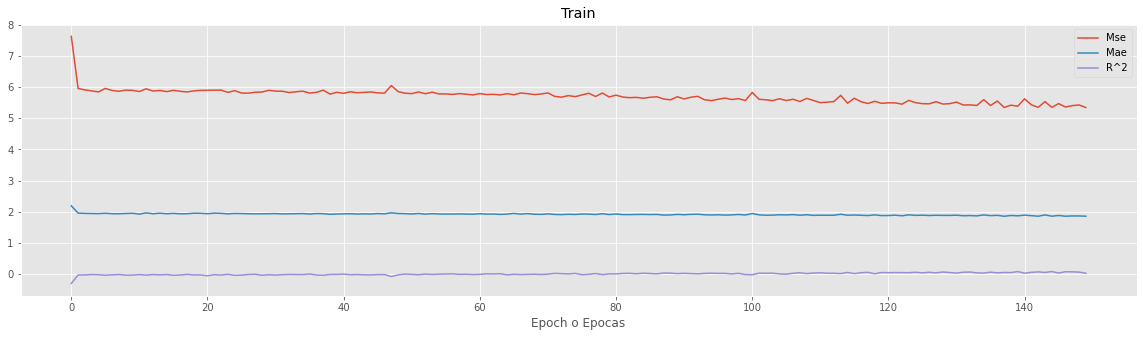

In [33]:
plt.figure(figsize = (20,5))
plt.style.use("ggplot")
plt.plot(pd.DataFrame(history.history)["loss"])
plt.plot(pd.DataFrame(history.history)["mean_absolute_error"])
plt.plot(pd.DataFrame(history.history)["R_squared"])
plt.legend(["Mse","Mae","R^2"])
plt.title("Train")
plt.xlabel("Epoch o Epocas")

In [34]:
pd.DataFrame(history.history).head()

,loss,mean_absolute_error,R_squared,val_loss,val_mean_absolute_error,val_R_squared
0,7.62,2.19,-0.30,5.29,1.83,-0.08
1,5.95,1.96,-0.02,4.96,1.77,-0.01
2,5.91,1.95,-0.02,5.04,1.78,-0.03
3,5.87,1.95,-0.01,4.94,1.77,-0.01
4,5.84,1.94,-0.02,5.07,1.80,-0.06


In [35]:
model.predict(X_train)

19/19 [==============================] - 0s 829us/step


array([[4.0956874],
       [4.6379   ],
       [4.092643 ],
       [4.605235 ],
       [4.9728904],
       [6.189854 ],
       [4.64026  ],
       [4.3291116],
       [4.022992 ],
       [4.2422695],
       [4.5100093],
       [4.139402 ],
       [3.8650346],
       [4.067058 ],
       [4.084547 ],
       [6.236346 ],
       [4.2182946],
       [4.612745 ],
       [4.3177943],
       [4.328425 ],
       [5.576883 ],
       [4.208318 ],
       [3.8954172],
       [3.8297753],
       [5.389394 ],
       [4.3088098],
       [4.5304127],
       [3.9328861],
       [4.161076 ],
       [3.9783974],
       [4.029781 ],
       [3.9955058],
       [4.09962  ],
       [4.2151394],
       [4.049317 ],
       [3.743658 ],
       [3.998609 ],
       [4.596564 ],
       [4.108155 ],
       [5.312046 ],
       [4.1033955],
       [3.9845018],
       [5.7124386],
       [3.804101 ],
       [3.827248 ],
       [3.8784828],
       [4.382092 ],
       [3.7954159],
       [4.32344  ],
       [5.6206846],


Con este resultado vemos que una red neuronal tiene peor efectividad que una regresión lineal. Por esta razón tampoco se considera un método útil para este caso.

### K-prototype

In [36]:
# k-protoype cluster
from kmodes.kprototypes import KPrototypes 

# Formato de pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [59]:
df_temp = df_norm.drop(columns = {'startup','brief_description'
                                  ,'hq_country','business_status'
                                  })
df_temp['last_known_valuation'] = df_temp['last_known_valuation'].interpolate()

df_temp.describe().T

,count,mean,std,min,25%,50%,75%,max
most_recent_raised_to_date,835.000,0.019,0.067,0.000,0.000,0.001,0.008,1.000
year_founded,835.000,0.590,0.244,0.000,0.417,0.667,0.750,1.000
biography,835.000,0.012,0.069,0.000,0.000,0.000,0.000,1.000
active_investors_names,835.000,0.124,0.131,0.000,0.031,0.086,0.168,1.000
most_recent_post_valuation,835.000,0.031,0.080,0.000,0.001,0.031,0.031,1.000
employees,835.000,0.015,0.061,0.000,0.001,0.003,0.011,1.000
lead_partners_on_deals_count,835.000,0.028,0.040,0.000,0.028,0.028,0.028,1.000
professionals_count,835.000,0.114,0.037,0.000,0.114,0.114,0.114,1.000
deals_count,835.000,0.206,0.170,0.000,0.067,0.133,0.267,1.000
most_recent_pr_acquired,835.000,0.262,0.141,0.000,0.262,0.262,0.262,1.000


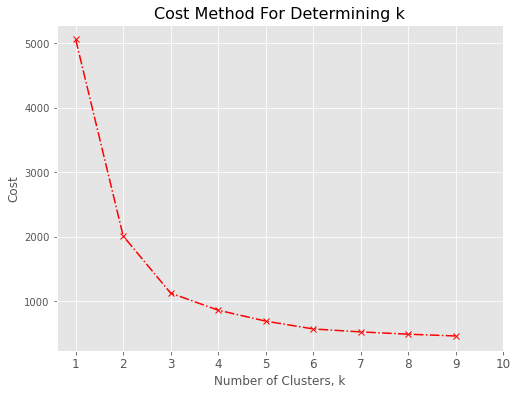

In [60]:
# Método del codo para encontrar el k optimo
cost = []
cat_vars = [1,2,15]


for cluster in range(1, 10):
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(df_temp, categorical = cat_vars)
        cost.append(kprototype.cost_)

# Selecting the optimal value for 𝑘 using elbow method
K = range(1,10)
    
plt.figure(figsize=(8,6))

plt.plot(K, cost, 'rx-.')

plt.xlabel('Number of Clusters, k', fontsize=12)
plt.xticks(range(1,11), fontsize=12)

plt.ylabel('Cost', fontsize=12)
plt.xticks(fontsize=12)

plt.title('Cost Method For Determining k', fontsize=16)

plt.show() 

In [63]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 6, init = 'Huang', random_state = 0)
kprototype_results = kprototype.fit_predict(df_temp,  categorical = cat_vars)

# Save clusters
df['cluster'] = kprototype.labels_

In [66]:
# Cluster interpretation
df.groupby('cluster').agg(
    {
        'startup':'count',
        'most_recent_raised_to_date':'mean',
        'primary_industry_code': lambda x: x.value_counts().index[0],
        'most_recent_deal_type_2': lambda x: x.value_counts().index[0],
        'year_founded':'mean',
        'hq_country': lambda x: x.value_counts().index[0],
        'biography':'mean',
        'active_investors_names':'median',
        'most_recent_post_valuation':'median',
        'employees':'mean',
        'lead_partners_on_deals_count':'mean',
        'professionals_count':'mean',
        'deals_count': 'mean',
        'business_status': lambda x: x.value_counts().index[0],
        'most_recent_pr_acquired': 'mean',
        'most_recent_deal_size': 'mean',
        'last_known_valuation': 'mean',
        'subsidiary_companies_count': 'mean',
        'deals_count': 'median',

    }
).reset_index().T


,0,1,2,3,4,5
cluster,0,1,2,3,4,5
startup,97,176,163,228,128,43
most_recent_raised_to_date,344.929,11.258,35.488,24.275,70.004,3.925
primary_industry_code,Energy,Energy,Energy,Energy,Energy,Energy
most_recent_deal_type_2,Pre-IPO,Pre-Seed,Seed,Pre-Seed,Series B,Pre-Seed
year_founded,2016.227,2017.489,2017.233,2017.268,2016.758,2016.721
hq_country,United States,United States,United States,United States,United States,Colombia
biography,27.990,16.125,21.730,31.553,40.602,11.953
active_investors_names,189.000,96.500,96.000,131.500,138.500,90.000
most_recent_post_valuation,1900.000,2.143,12.890,55.000,258.750,0.333


In [68]:
startups_relevantes = {'Addi','Agrapp','Chiper','Clutch (Automotive)','Elenas','Frubana','Global66','Habi','La Haus'
                       ,'Liftit','Momentu','Multiverse Computing','Picap','Pikl Insurance','R5','SolidBlock','Tul'
                       ,'Yana','Clara','Cubbo','Foodology','Hunty','JOKR','Koban','Laika','Littio','Pandas','Pomelo'
                       ,'ProGrad','Pulppo','Pura mente','Treble ai','Treinta','Tuio','Yuno','Aflore','Buda.com'
                       ,'DRONAMICS','Erco energia','Fitpal','Gopass','Lineru','Mesfix','Movii','Nudos','Pinbus'
                       ,'Saludtools','SoSure','Bitso','Kavak.com','Kiwi','Lentesplus','Platzi','Rappi','Sempli'
                       ,'Ubits','Helo','Speedetab'}

groups = df[df['startup'].isin(startups_relevantes)]
groups = groups[['startup','cluster']].sort_values(by=['cluster'],axis=0)

for g in range(0,6):
    print("-----------------Group: "+str(g+1)+"-----------------")
    for v in groups[groups['cluster']==g]['startup']:
        print(v)

-----------------Group: 1-----------------
Helo
Momentu
Bitso
Rappi
Tul
Addi
Kavak.com
JOKR
Picap
Clara
Gopass
-----------------Group: 2-----------------
Frubana
Global66
Pandas
Lineru
Treinta
SolidBlock
Pura mente
-----------------Group: 3-----------------
Clutch (Automotive)
Pikl Insurance
Lentesplus
Aflore
Saludtools
La Haus
Speedetab
Treble ai
SoSure
Kiwi
Pulppo
-----------------Group: 4-----------------
R5
Pomelo
Fitpal
Nudos
Buda.com
Chiper
Pinbus
Multiverse Computing
Yuno
Sempli
Tuio
Habi
Elenas
-----------------Group: 5-----------------
Platzi
Littio
Agrapp
Foodology
Mesfix
DRONAMICS
Movii
Laika
Koban
Liftit
-----------------Group: 6-----------------
Hunty
Ubits
Yana
Cubbo
ProGrad
Erco energia


### 4. Producción

In [72]:
# Función para predecir y limpiar los datos de un nuevo registro
df_predict, df_norm_predict = limpiar_datos_venture(df[:1])

df_norm_predict = df_predict.copy()
    
for feature_name in df_predict.columns:     
    if feature_name not in list(df_predict.select_dtypes(['category','object']).columns):
        #Normalize
        df_norm_predict[feature_name] = df_norm_predict[feature_name].astype(np.float64)
        max_val = df[feature_name].max()
        min_val = df[feature_name].min()
        df_norm_predict[feature_name] = (df_norm_predict[feature_name] - min_val) / (max_val - min_val)
        #Fill na with mean
        df_norm_predict[feature_name] = df[feature_name].fillna(df[feature_name].mean())
    else:
        df_norm_predict[feature_name] = df_norm_predict[feature_name]

df_norm_predict.head()

,startup,most_recent_raised_to_date,primary_industry_code,most_recent_deal_type_2,brief_description,year_founded,hq_country,biography,active_investors_names,most_recent_post_valuation,...,lead_partners_on_deals_count,professionals_count,deals_count,business_status,most_recent_pr_acquired,most_recent_deal_size,last_known_valuation,subsidiary_companies_count,country,cluster
0,Conta simples,24.537,Energy,Series A,Developer of digital bank account intended to ...,2018.000,Brazil,91,370,2.143,...,1.000,6.370,4,Generating Revenue,0.279,21.656,2.143,0,Latam,1


### 5. Resultados
•	Modelar la valoración mediante una regresión dio un r^2 de 0.72 después de utilizar Ridge.

•	La red neuronal planteada para predecir la valoración de una Startup presenta un pésimo desempeño y se sugiere utilizar métodos para optimizarla o cambiar su arquitectura.

•	El modelo de Kprototypes es el que presento uno de los mejores resultados ya que adicional se identifico las startups mas exitosas por grupo y con esto se puede tener un referente importante.

### 5. Conclusiones
Considero que este proyecto es un excelente primer acercamiento para tratar de utilizar datos para robustecer los procesos de identificación de oportunidades de inversión en un fondo de capital de riesgo. Adicional vemos como los distintos modelos se pueden complementar para tener incluso una versión mucho más integral sobre el posible éxito de una Startup. Los pasos siguientes podrían ser mejorar las fuentes de datos y optimizar los modelos, especialmente la red neuronal.
